In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [11]:
# Load the dataset
df = pd.read_csv('../data/sample_sales.csv')  # Replace path if needed

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Calculate revenue
df['revenue'] = df['price'] * df['quantity']

# Preview data
df[['date', 'product_name', 'quantity', 'price', 'revenue']].head()


,date,product_name,quantity,price,revenue
0,2023-09-04,Antibiotic Ointment,3,30.30,90.90
1,2024-04-08,Paracetamol,3,19.09,57.27
2,2024-05-02,Cough Syrup,5,52.75,263.75
3,2024-03-16,Antibiotic Ointment,2,48.83,97.66
4,2023-07-31,Cough Syrup,5,95.82,479.10


In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
# Aggregate daily revenue
daily_revenue = df.groupby('date')['revenue'].sum().reset_index()

# Rename columns for Prophet
daily_revenue.rename(columns={'date': 'ds', 'revenue': 'y'}, inplace=True)

# Check format
daily_revenue.head()


,ds,y
0,2023-01-01,39634.19
1,2023-01-02,66855.23
2,2023-01-03,1125.83
3,2023-01-04,1111.22
4,2023-01-05,205777.86


In [14]:
# Initialize model
model = Prophet()

# Fit model
model.fit(daily_revenue)


23:52:16 - cmdstanpy - INFO - Chain [1] start processing
23:52:17 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
# Forecast for the next 30 days
future = model.make_future_dataframe(periods=30)

# Check future dates
future.tail()


,ds
566,2024-07-20
567,2024-07-21
568,2024-07-22
569,2024-07-23
570,2024-07-24


In [16]:
# Generate forecast
forecast = model.predict(future)

# Preview results
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
566,2024-07-20,75898.749274,-61384.090211,220986.316410
567,2024-07-21,105160.440312,-35982.509485,248409.598760
568,2024-07-22,79850.070727,-64547.317288,209539.465431
569,2024-07-23,86245.073438,-53836.712887,221943.488200
570,2024-07-24,94609.470635,-41157.643631,230364.249212


C:\Users\himan\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


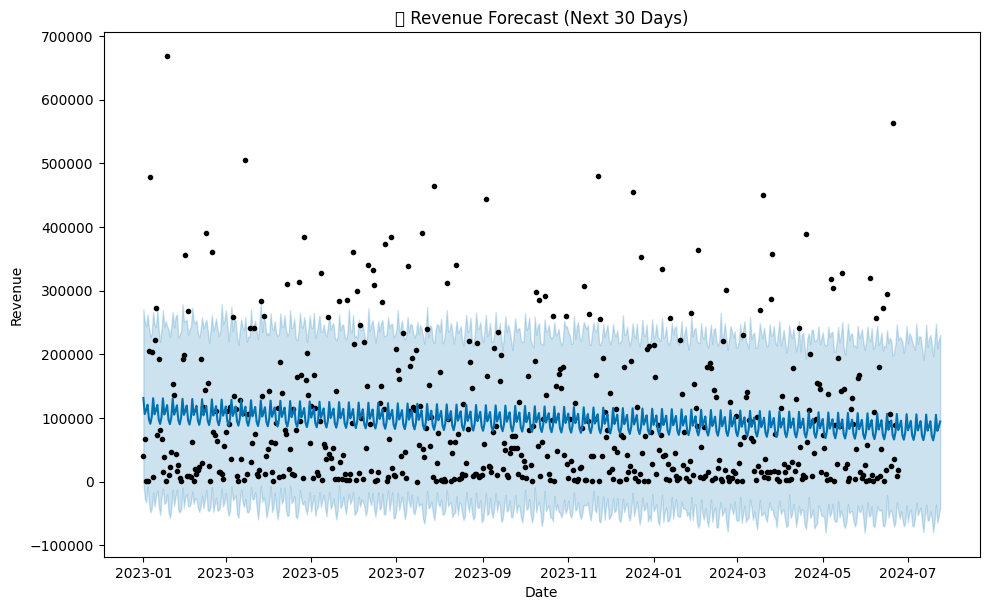

In [17]:
# Forecast line chart
fig1 = model.plot(forecast)
plt.title("📈 Revenue Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid()
plt.show()


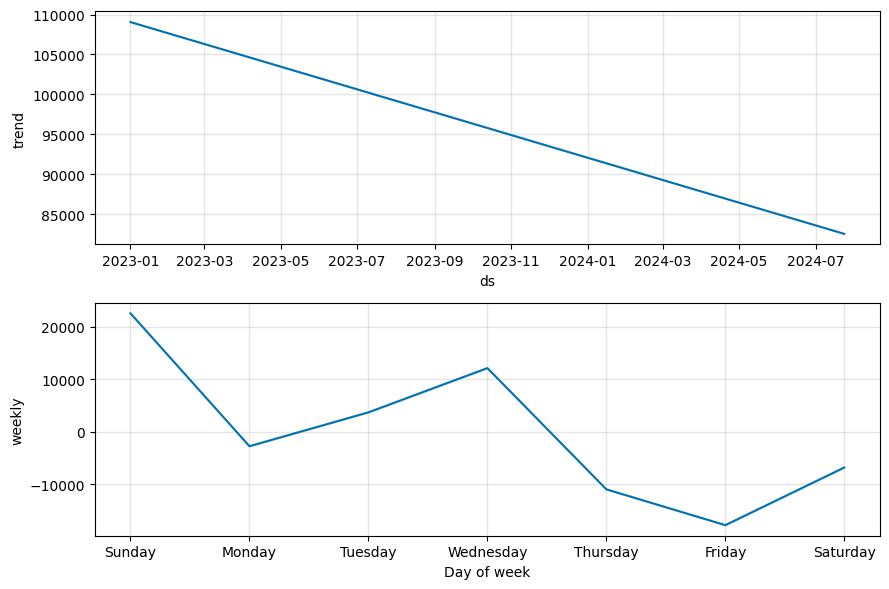

In [18]:
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()


In [19]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("forecast_output.csv", index=False)


In [1]:
df['Profit'] = df['Revenue'] - df['Cost']


NameError: name 'df' is not defined

In [4]:
import pandas as pd

# Load your dataset
df = pd.read_csv('../data/sample_sales.csv')

# Ensure correct column names (lowercase & stripped spaces just in case)
df.columns = df.columns.str.lower().str.strip()

# Calculate Revenue and Cost
df['revenue'] = df['price'] * df['quantity']
df['cost'] = df['cost_price'] * df['quantity']

# Calculate Profit
df['profit'] = df['revenue'] - df['cost']

print(df.head())


  user_id order_id        date     category product_id       product_name  \
0   U0164  ORD0115  2023-01-26      Fitness      P0030          Treadmill   
1   U0190  ORD0282  2023-09-08      Grocery      P0010       Almonds 500g   
2   U0058  ORD0143  2023-04-15  Electronics      P0003  Bluetooth Speaker   
3   U0174  ORD0759  2024-07-12      Grocery      P0010       Almonds 500g   
4   U0023  ORD0605  2024-03-08      Grocery      P0006   Basmati Rice 5kg   

   quantity    price  cost_price  revenue     cost   profit  
0         1   648.25      452.22   648.25   452.22   196.03  
1         1   977.50      671.90   977.50   671.90   305.60  
2         3  2404.17     1555.01  7212.51  4665.03  2547.48  
3         1   977.50      671.90   977.50   671.90   305.60  
4         2   237.05      211.21   474.10   422.42    51.68  


In [6]:
from prophet import Prophet

# Make sure column names are lowercase
df.columns = df.columns.str.lower()

# Calculate revenue & profit
df['revenue'] = df['price'] * df['quantity']
df['profit'] = df['revenue'] - (df['cost_price'] * df['quantity'])

# Prepare data for Prophet
profit_df = df[['date', 'profit']].rename(columns={'date': 'ds', 'profit': 'y'})

# Train Prophet model
profit_model = Prophet()
profit_model.fit(profit_df)

# Forecast next 365 days
future_profit = profit_model.make_future_dataframe(periods=365)
profit_forecast = profit_model.predict(future_profit)

# See results
profit_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()


11:07:55 - cmdstanpy - INFO - Chain [1] start processing
11:07:55 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2023-01-01,658.663048,-229.551056,1645.227249
1,2023-01-02,746.078191,-243.752186,1697.661734
2,2023-01-03,667.438535,-345.283759,1617.032742
3,2023-01-04,654.186331,-376.207193,1559.303778
4,2023-01-05,734.968602,-215.067621,1690.457461


11:09:28 - cmdstanpy - INFO - Chain [1] start processing
11:09:28 - cmdstanpy - INFO - Chain [1] done processing


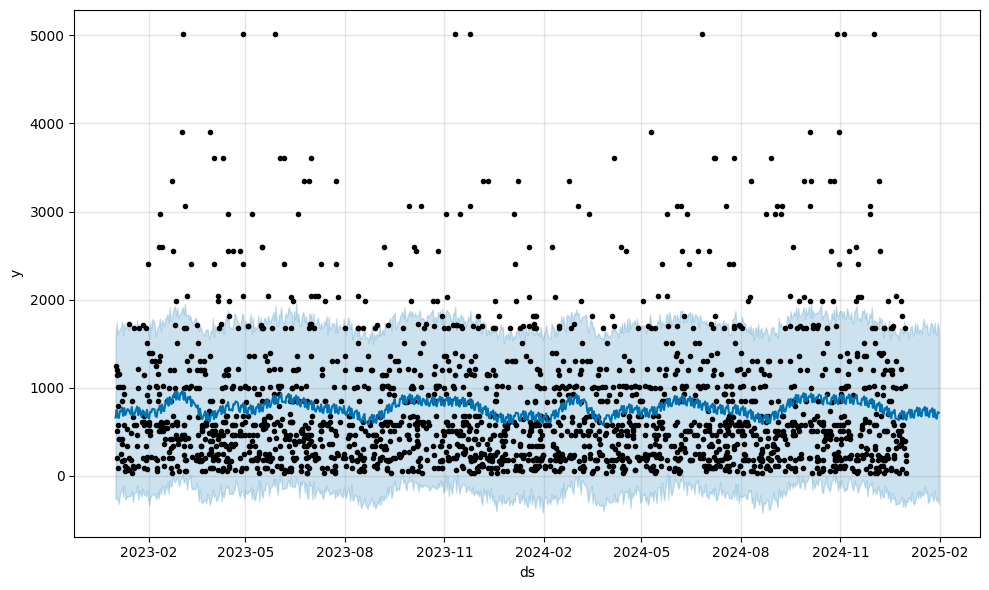

In [10]:
import pandas as pd
from prophet import Prophet

# Load your CSV
df = pd.read_csv('../data/sample_sales.csv')

# Calculate Revenue
df['Revenue'] = df['quantity'] * df['price']

# Calculate Profit
df['Profit'] = df['Revenue'] - (df['quantity'] * df['cost_price'])

# Prepare DataFrame for Prophet
profit_df = df[['date', 'Profit']].copy()
profit_df.rename(columns={'date': 'ds', 'Profit': 'y'}, inplace=True)

# Ensure date format is correct
profit_df['ds'] = pd.to_datetime(profit_df['ds'])

# Train Prophet
model = Prophet()
model.fit(profit_df)

# Make future predictions (next 30 days)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plot
fig = model.plot(forecast)


11:10:45 - cmdstanpy - INFO - Chain [1] start processing
11:10:45 - cmdstanpy - INFO - Chain [1] done processing


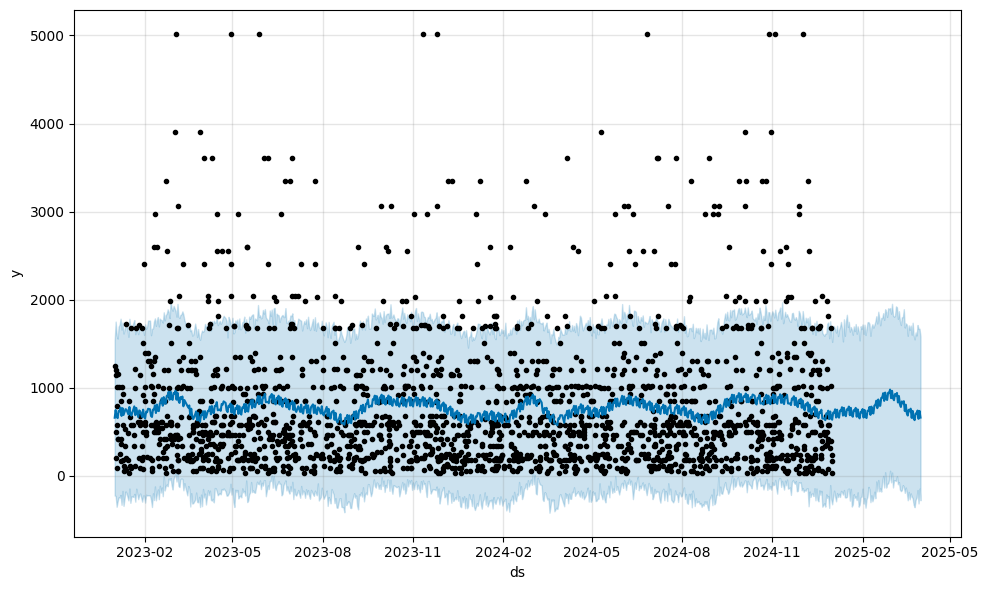

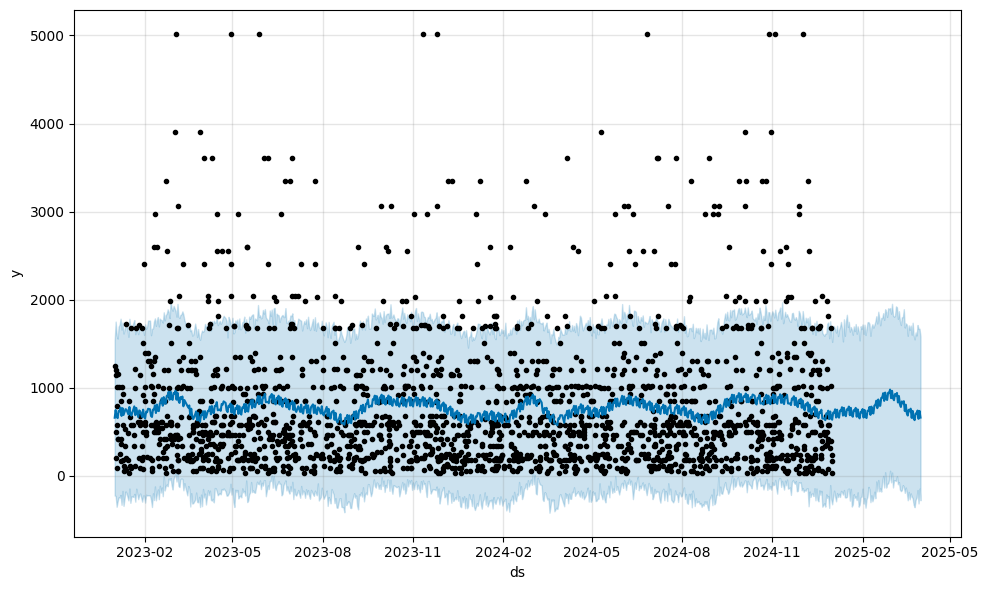

In [12]:
import pandas as pd
from prophet import Prophet

# 1. Load your data
df = pd.read_csv('../data/sample_sales.csv')

# 2. Calculate Profit = (price - cost_price) * quantity
df['Profit'] = (df['price'] - df['cost_price']) * df['quantity']

# 3. Prepare data for Prophet (renaming for Prophet's format)
df_prophet = df[['date', 'Profit']].copy()
df_prophet.rename(columns={'date': 'ds', 'Profit': 'y'}, inplace=True)

# 4. Ensure date is in datetime format
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# 5. Create and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

# 6. Create future dataframe for 90 days
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# 7. Plot the forecast
model.plot(forecast)


In [13]:
from prophet import Prophet
import pandas as pd

In [14]:
# 1️⃣ Load your data
df = pd.read_csv('../data/sample_sales.csv')


In [16]:
df['Profit'] = df['sales'] - df['expenses']


KeyError: 'sales'